# LSTM


In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as pl
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [91]:
# Data loading and pre-processing:
data_dir = '/afs/cern.ch/user/m/mrapelli/private/filldata/'
#merged_data = pd.DataFrame()

for filename in sorted(os.listdir(data_dir), reverse=True):
    if not filename.startswith("lumiData"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['E(GeV)'])
    print (dataset.shape)
    dataset.columns = ['Timestamp','fill', 'pltzero', 'bcm1f', 'hfoc']
    dataset = dataset.set_index('Timestamp')
    #dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

lumiData_fillRange.csv
(40758, 5)
            fill   pltzero     bcm1f      hfoc
Timestamp                                     
1656979796  7916  0.007553  0.007406  0.006119
1656979815  7916  0.007098  0.006290  0.005698
1656979838  7916  0.006711  0.006589  0.005369
1656979862  7916  0.007862  0.008623  0.006937
1656979885  7916  0.008179  0.008251  0.006847
(40758,)


In [92]:
display(dataset)

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,0.007553,0.007406,0.006119
1656979815,7916,0.007098,0.006290,0.005698
1656979838,7916,0.006711,0.006589,0.005369
1656979862,7916,0.007862,0.008623,0.006937
1656979885,7916,0.008179,0.008251,0.006847
...,...,...,...,...
1660006952,8111,0.000009,0.000000,0.000000
1660006976,8111,0.000009,0.000000,0.000000
1660006999,8111,0.000019,0.000000,0.000000


In [93]:
fills = dataset['fill'].unique()
print(np.shape(fills))
fills

(50,)


array([7916, 7920, 7921, 7923, 7960, 7963, 7965, 7966, 7967, 7969, 7978,
       8007, 8016, 8017, 8018, 8019, 8020, 8022, 8023, 8027, 8030, 8033,
       8043, 8046, 8057, 8058, 8059, 8062, 8063, 8067, 8068, 8072, 8073,
       8076, 8078, 8079, 8081, 8083, 8087, 8088, 8091, 8094, 8098, 8099,
       8100, 8102, 8103, 8106, 8108, 8111])

In [94]:
import matplotlib.pyplot as plt

for i in range(50):
    name = i
    df = dataset.loc[dataset['fill'] == fills[i]]
    df = df.drop(df.columns[[0]], axis=1)
    #display(df)
    df.plot(figsize = (12,6))
    plt.title(f"Fill{fills[i]}")
    #plt.savefig(f"fill_{name}.png")
    #plt.show()
    plt.close()

In [95]:
bad_fills = [7921, 7966, 7969, 8016, 8018, 8019, 8027, 8030, 8046, 8057, 8059, 8062, 8067, 8072, 8073, 8094, 8098, 8099]
good_fills = [f for f in fills if f not in bad_fills]

In [96]:
dataset_train = dataset[dataset.fill.apply(lambda x : x in good_fills)]
dataset_test = dataset[dataset.fill.apply(lambda x : x in bad_fills)]
#dataset_test = dataset_train['2018-05-01 11:02:05 23:52:39':]
#dataset_train = dataset[dataset.fill.apply(lambda x : x ==7921)]
#dataset_test = dataset[dataset.fill.apply(lambda x : x ==7916)]

In [97]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
#dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
#dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,0.007553,0.007406,0.006119
1656979815,7916,0.007098,0.006290,0.005698
1656979838,7916,0.006711,0.006589,0.005369
1656979862,7916,0.007862,0.008623,0.006937
1656979885,7916,0.008179,0.008251,0.006847
...,...,...,...,...
1660006952,8111,0.000009,0.000000,0.000000
1660006976,8111,0.000009,0.000000,0.000000
1660006999,8111,0.000019,0.000000,0.000000


,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1657073569,7921,0.000724,0.000492,0.0
1657073580,7921,0.000574,0.000316,0.0
1657073604,7921,0.000640,0.000514,0.0
1657073627,7921,0.000740,0.000470,0.0
1657073650,7921,0.000433,0.000389,0.0
...,...,...,...,...
1659760396,8099,0.000009,0.000000,0.0
1659760419,8099,0.000009,0.000000,0.0
1659760442,8099,0.000019,0.000000,0.0


In [98]:
from sklearn import preprocessing

# Normalize data
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
#X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [99]:
X_train

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,0.0,5.211537e-07,5.113103e-07,4.102044e-07
1656979815,0.0,4.897182e-07,4.342324e-07,3.819739e-07
1656979838,0.0,4.630354e-07,4.549115e-07,3.599269e-07
1656979862,0.0,5.424544e-07,5.952790e-07,4.650461e-07
1656979885,0.0,5.643148e-07,5.695851e-07,4.589931e-07
...,...,...,...,...
1660006952,1.0,6.491779e-10,0.000000e+00,0.000000e+00
1660006976,1.0,6.491779e-10,0.000000e+00,0.000000e+00
1660006999,1.0,1.298287e-09,0.000000e+00,0.000000e+00


In [100]:
X_train["fill"] = dataset_train["fill"]

In [101]:
X_train

,fill,pltzero,bcm1f,hfoc
Timestamp,,,,
1656979796,7916,5.211537e-07,5.113103e-07,4.102044e-07
1656979815,7916,4.897182e-07,4.342324e-07,3.819739e-07
1656979838,7916,4.630354e-07,4.549115e-07,3.599269e-07
1656979862,7916,5.424544e-07,5.952790e-07,4.650461e-07
1656979885,7916,5.643148e-07,5.695851e-07,4.589931e-07
...,...,...,...,...
1660006952,8111,6.491779e-10,0.000000e+00,0.000000e+00
1660006976,8111,6.491779e-10,0.000000e+00,0.000000e+00
1660006999,8111,1.298287e-09,0.000000e+00,0.000000e+00


In [102]:
#Prepocessing, drop channel column
trainX1=X_train.drop(columns = ["fill"]) 
#trainX=trainX.drop(trainX.columns[[0]], axis=1)
display(trainX1)
testX1 = X_test.drop(columns = ["fill"]) 
#testX=testX.drop(testX.columns[[0]], axis=1)
display(testX1)

,pltzero,bcm1f,hfoc
Timestamp,,,
1656979796,5.211537e-07,5.113103e-07,4.102044e-07
1656979815,4.897182e-07,4.342324e-07,3.819739e-07
1656979838,4.630354e-07,4.549115e-07,3.599269e-07
1656979862,5.424544e-07,5.952790e-07,4.650461e-07
1656979885,5.643148e-07,5.695851e-07,4.589931e-07
...,...,...,...
1660006952,6.491779e-10,0.000000e+00,0.000000e+00
1660006976,6.491779e-10,0.000000e+00,0.000000e+00
1660006999,1.298287e-09,0.000000e+00,0.000000e+00


,pltzero,bcm1f,hfoc
Timestamp,,,
1657073569,4.998408e-08,3.398305e-08,0.0
1657073580,3.959771e-08,2.180951e-08,0.0
1657073604,4.414175e-08,3.550412e-08,0.0
1657073627,5.103881e-08,3.246129e-08,0.0
1657073650,2.986060e-08,2.688187e-08,0.0
...,...,...,...
1659760396,6.491779e-10,0.000000e+00,0.0
1659760419,6.491779e-10,0.000000e+00,0.0
1659760442,1.298287e-09,0.000000e+00,0.0


In [103]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns

In [104]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 

seq_size = 30  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

In [105]:
#Define sequences from dataframe
trainX, trainY = to_sequences(trainX1, trainX1, seq_size)
testX, testY = to_sequences(testX1,testX1, seq_size)

In [106]:
input_length = trainX.shape[1]
input_dim = trainX.shape[2]
output_dim = len(trainY[0])

In [107]:
#Define the model
model = Sequential()
model.add(LSTM(128, input_dim = input_dim, input_length = input_length))
 # The max output value is > 1 so relu is used as final activation.
model.add(Dropout(rate=0.2))
model.add(Dense(output_dim))
model.compile(loss='mae',
               optimizer='adam',
               )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               67584     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 67,971
Trainable params: 67,971
Non-trainable params: 0
_________________________________________________________________


In [108]:
#Fit the model
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
798/798 [==============================] - 22s 24ms/step - loss: 0.0239 - val_loss: 0.0175
Epoch 2/100
798/798 [==============================] - 19s 23ms/step - loss: 0.0169 - val_loss: 0.0158
Epoch 3/100
798/798 [==============================] - 18s 23ms/step - loss: 0.0153 - val_loss: 0.0179
Epoch 4/100
798/798 [==============================] - 19s 24ms/step - loss: 0.0141 - val_loss: 0.0130
Epoch 5/100
798/798 [==============================] - 19s 24ms/step - loss: 0.0139 - val_loss: 0.0124
Epoch 6/100
798/798 [==============================] - 19s 23ms/step - loss: 0.0137 - val_loss: 0.0138
Epoch 7/100
798/798 [==============================] - 19s 24ms/step - loss: 0.0136 - val_loss: 0.0163
Epoch 8/100
798/798 [==============================] - 19s 24ms/step - loss: 0.0136 - val_loss: 0.0190
Epoch 9/100
798/798 [==============================] - 19s 23ms/step - loss: 0.0133 - val_loss: 0.0116
Epoch 10/100
798/798 [==============================] - 18s 22ms/step - l

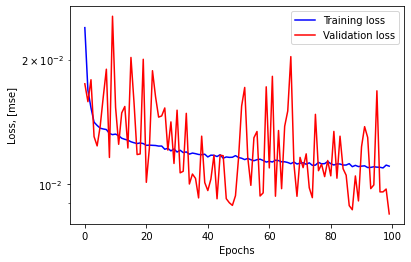

In [109]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.yscale('log')
plt.show()

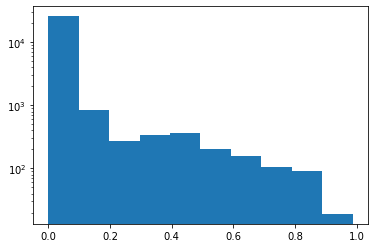

In [110]:
Xtrain1 = trainX1.iloc[0:28362,: ]
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - Xtrain1), axis=1)
plt.hist(trainMAE, bins=10)
plt.yscale('log')

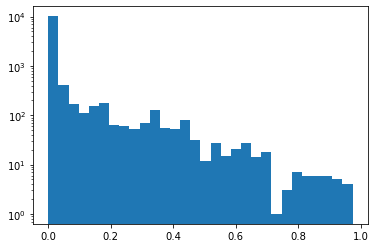

In [111]:
Xtest1 = testX1.iloc[0:11960,: ]
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - Xtest1), axis=1)
plt.hist(testMAE, bins=30)
plt.yscale('log')

In [112]:
threshold = 0.9

In [113]:
#Capture all details in a DataFrame for easy plotting-test
anomaly_df = pd.DataFrame(X_test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['Threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['Threshold']

In [114]:
display(anomaly_df)

,fill,pltzero,bcm1f,hfoc,testMAE,Threshold,anomaly
Timestamp,,,,,,,
1657074237,0.025641,7.348135e-04,0.000729,0.000694,0.000930,0.9,False
1657074261,0.025641,7.339017e-04,0.000726,0.000692,0.000931,0.9,False
1657074284,0.025641,7.323903e-04,0.000726,0.000691,0.000930,0.9,False
1657074307,0.025641,7.331536e-04,0.000726,0.000690,0.000929,0.9,False
1657074331,0.025641,7.306480e-04,0.000724,0.000689,0.000929,0.9,False
...,...,...,...,...,...,...,...
1659760396,0.938462,6.491779e-10,0.000000,0.000000,NaN,0.9,False
1659760419,0.938462,6.491779e-10,0.000000,0.000000,NaN,0.9,False
1659760442,0.938462,1.298287e-09,0.000000,0.000000,NaN,0.9,False


In [115]:
df = anomaly_df.loc[anomaly_df['anomaly'] == True]
df

,fill,pltzero,bcm1f,hfoc,testMAE,Threshold,anomaly
Timestamp,,,,,,,
1659749757,0.933333,0.907115,0.904433,0.906880,0.905748,0.9,True
1659749780,0.933333,0.931569,0.929453,0.930934,0.930275,0.9,True
1659749804,0.933333,0.930265,0.928169,0.929427,0.928642,0.9,True
1659749827,0.933333,0.929687,0.927458,0.928807,0.927713,0.9,True
1659749850,0.933333,0.928831,0.926518,0.927766,0.926531,0.9,True
1659749873,0.933333,0.933478,0.931148,0.933176,0.931398,0.9,True
1659749897,0.933333,0.969265,0.967453,0.969622,0.967877,0.9,True
1659749920,0.933333,0.974834,0.973599,0.974974,0.973621,0.9,True
1659749943,0.933333,0.973841,0.972769,0.974108,0.972965,0.9,True


<AxesSubplot:xlabel='Timestamp'>

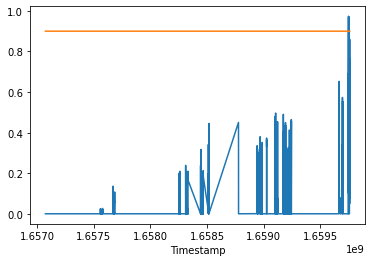

In [116]:
#Plot testMAE vs max_trainMAE
anomaly_df['testMAE'].plot()
anomaly_df['Threshold'].plot()

In [117]:
anomaly_df_train = pd.DataFrame(X_train[seq_size:])
anomaly_df_train['trainMAE'] = trainMAE
anomaly_df_train['Threshold'] = threshold
anomaly_df_train['anomaly'] = anomaly_df_train['trainMAE'] > anomaly_df_train['Threshold']

In [118]:
anomaly_df_train

,fill,pltzero,bcm1f,hfoc,trainMAE,Threshold,anomaly
Timestamp,,,,,,,
1656980516,7916,5.597323e-07,5.514161e-07,4.514754e-07,0.000928,0.9,False
1656980539,7916,5.362241e-07,5.702158e-07,4.429033e-07,0.000928,0.9,False
1656980562,7916,5.501147e-07,5.764741e-07,4.425703e-07,0.000928,0.9,False
1656980586,7916,5.487933e-07,5.658226e-07,4.448952e-07,0.000928,0.9,False
1656980609,7916,5.527347e-07,5.507792e-07,4.377970e-07,0.000928,0.9,False
...,...,...,...,...,...,...,...
1660006952,8111,6.491779e-10,0.000000e+00,0.000000e+00,NaN,0.9,False
1660006976,8111,6.491779e-10,0.000000e+00,0.000000e+00,NaN,0.9,False
1660006999,8111,1.298287e-09,0.000000e+00,0.000000e+00,NaN,0.9,False


<AxesSubplot:xlabel='Timestamp'>

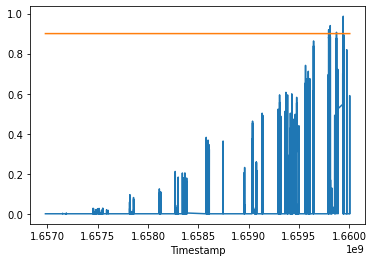

In [119]:
#Plot testMAE vs max_trainMAE
anomaly_df_train['trainMAE'].plot()
anomaly_df_train['Threshold'].plot()

<AxesSubplot:xlabel='Timestamp'>

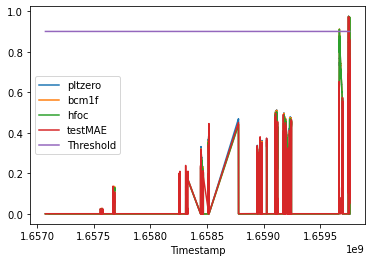

In [120]:
anomaly_df.drop(columns=["fill"]).plot()

<AxesSubplot:xlabel='Timestamp'>

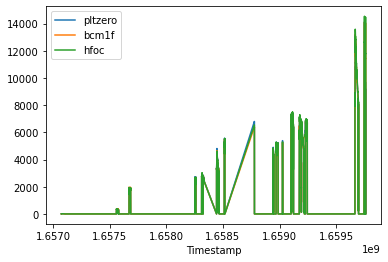

In [121]:
dataset_test.drop(columns=['fill']).plot()

In [122]:
#Capture all details in a DataFrame for easy plotting-train
anomaly = pd.DataFrame(X_train[seq_size:])
anomaly['trainMAE'] = trainMAE
anomaly['Threshold'] = threshold
anomaly['anomaly'] = anomaly['trainMAE'] > anomaly['Threshold']

In [123]:
#Prepare to plot anomalies-Test 
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

In [124]:
anomalies

,fill,pltzero,bcm1f,hfoc,testMAE,Threshold,anomaly
Timestamp,,,,,,,
1659749757,0.933333,0.907115,0.904433,0.906880,0.905748,0.9,True
1659749780,0.933333,0.931569,0.929453,0.930934,0.930275,0.9,True
1659749804,0.933333,0.930265,0.928169,0.929427,0.928642,0.9,True
1659749827,0.933333,0.929687,0.927458,0.928807,0.927713,0.9,True
1659749850,0.933333,0.928831,0.926518,0.927766,0.926531,0.9,True
1659749873,0.933333,0.933478,0.931148,0.933176,0.931398,0.9,True
1659749897,0.933333,0.969265,0.967453,0.969622,0.967877,0.9,True
1659749920,0.933333,0.974834,0.973599,0.974974,0.973621,0.9,True
1659749943,0.933333,0.973841,0.972769,0.974108,0.972965,0.9,True


<AxesSubplot:xlabel='Timestamp'>

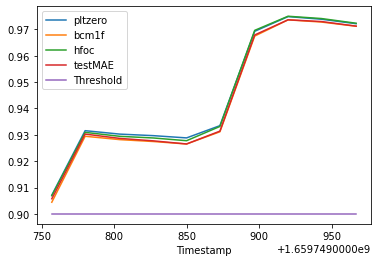

In [125]:
anomalies.drop(columns="fill").plot()

In [126]:
anomaly_df

,fill,pltzero,bcm1f,hfoc,testMAE,Threshold,anomaly
Timestamp,,,,,,,
1657074237,0.025641,7.348135e-04,0.000729,0.000694,0.000930,0.9,False
1657074261,0.025641,7.339017e-04,0.000726,0.000692,0.000931,0.9,False
1657074284,0.025641,7.323903e-04,0.000726,0.000691,0.000930,0.9,False
1657074307,0.025641,7.331536e-04,0.000726,0.000690,0.000929,0.9,False
1657074331,0.025641,7.306480e-04,0.000724,0.000689,0.000929,0.9,False
...,...,...,...,...,...,...,...
1659760396,0.938462,6.491779e-10,0.000000,0.000000,NaN,0.9,False
1659760419,0.938462,6.491779e-10,0.000000,0.000000,NaN,0.9,False
1659760442,0.938462,1.298287e-09,0.000000,0.000000,NaN,0.9,False


In [127]:
#Capture all details in a DataFrame for easy plotting-test
anomaly_df = pd.DataFrame(X_test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['Threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['Threshold']

In [128]:
#Prepare to plot anomalies-Test 
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

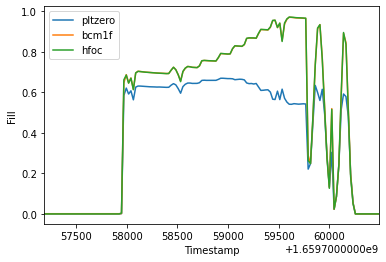

In [129]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1659757185,1659760489))    #8099
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8099.png")

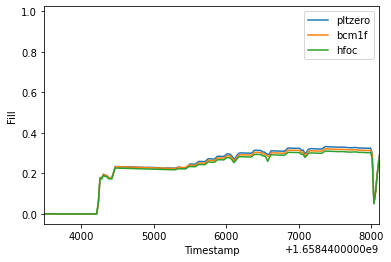

In [130]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1658443493,1658448107))    #8027
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8027.png")

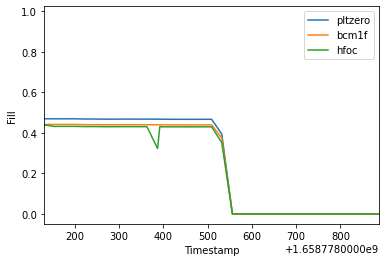

In [131]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1658778131,1658778887))    #8046
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8046.png")

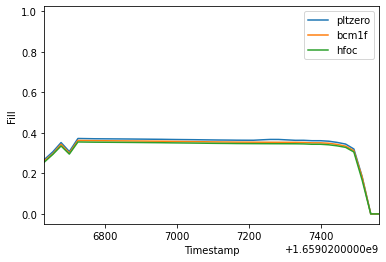

In [132]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1659026630,1659027563))    #8062
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8062.png")

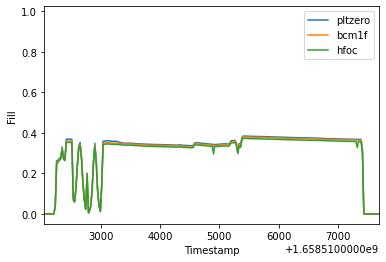

In [133]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1658512046,1658517696))    #8062
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8030.png")

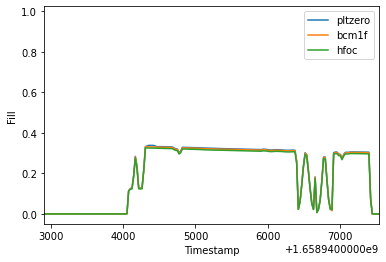

In [134]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1658942902,1658947546))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8057.png")

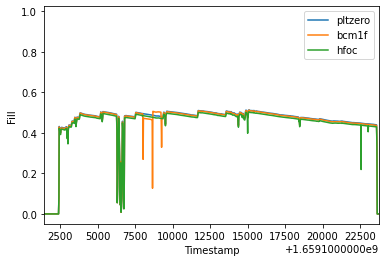

In [135]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1659101417,1659123763))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8067.png")

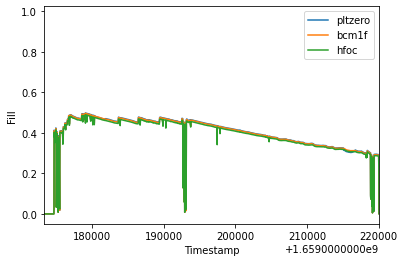

In [136]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1659173359,1659220055))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8072.png")

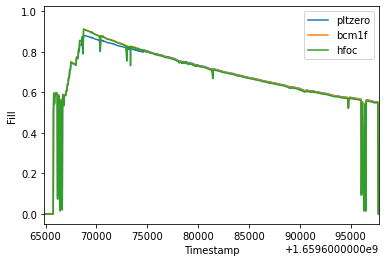

In [137]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1659664864,1659697777))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')
plt.savefig(f"Anomalydetectionfill_8094.png")

In [138]:
print(bad_fills)

[7921, 7966, 7969, 8016, 8018, 8019, 8027, 8030, 8046, 8057, 8059, 8062, 8067, 8072, 8073, 8094, 8098, 8099]


In [139]:
dp = dataset_test.loc[dataset_test['fill'] == 8098]
dp.reset_index()
#dp.iloc[1850,:]
#dp.iloc[150,:]
#timestamps = dp['Timestamp'].unique()

,Timestamp,fill,pltzero,bcm1f,hfoc
0,1659747286,8098,10.177141,16.178782,0.0
1,1659747308,8098,10.158441,16.120295,0.0
2,1659747331,8098,10.148677,16.094748,0.0
3,1659747354,8098,10.135297,16.099087,0.0
4,1659747377,8098,10.136685,16.108401,0.0
...,...,...,...,...,...
119,1659750060,8098,0.000038,0.000000,0.0
120,1659750083,8098,0.000000,0.000000,0.0
121,1659750107,8098,0.000009,0.000000,0.0
122,1659750130,8098,0.000000,0.000000,0.0


[Text(0.5, 0, 'Timestamp'), Text(0, 0.5, 'Fill')]

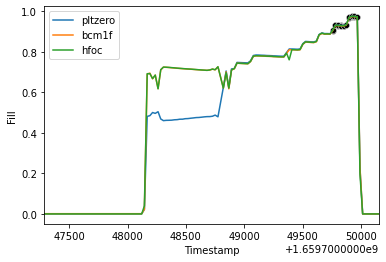

In [140]:
ax=anomaly_df.drop(columns=["fill", "testMAE","Threshold"]).plot(xlim=(1659747286,1659750153))    #tryout
sns.scatterplot(data=anomalies, x="Timestamp", y="pltzero", color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="bcm1f",color="black")
sns.scatterplot(data=anomalies, x="Timestamp", y="hfoc",color="black")
ax.set(xlabel='Timestamp', ylabel='Fill')

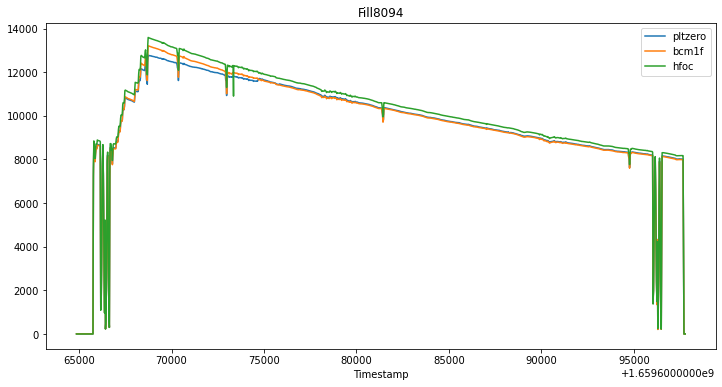

In [141]:
df = dataset.loc[dataset['fill'] == 8094]
df = df.drop(df.columns[[0]], axis=1)
#display(df)
df.plot(figsize = (12,6))
plt.title(f"Fill{8094}")
plt.savefig(f"fill_8094.png")
plt.show()
plt.close()